In [1]:
import pandas as pd
import seaborn as sns

In [2]:
path_to_file = 'taxi_peru.csv'

In [3]:
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

journey_id – уникальный id поездки
user_id – id пользователя
driver_id – id водителя
taxi_id – id машины
icon – тип поездки
start_type – тип заказа (asap, reserved, delayed)
start_at – время начала поездки
start_lat – исходное местоположение пользователя, широта
start_lon – исходное местоположение пользователя, долгота
end_at – время окончания поездки
end_lat – итоговое местоположение, широта
end_lon – итоговое местоположение, долгота
end_state – состояние заказа
driver_start_lat – исходное местоположение водителя, широта
driver_start_lon – исходное местоположение водителя, долгота
arrived_at – время прибытия водителя
source – платформа, с которой сделан заказ
driver_score – оценка водителя клиентом
rider_score – оценка клиента водителем

In [4]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [6]:
taxi.shape

(23111, 19)

In [7]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  object        
 5   start_type        23111 non-null  object        
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  object        
 8   start_lon         23111 non-null  object        
 9   end_at            22835 non-null  datetime64[ns]
 10  end_lat           23111 non-null  object        
 11  end_lon           23111 non-null  object        
 12  end_state         23099 non-null  object        
 13  driver_start_lat  19621 non-null  object        
 14  driver_start_lon  1962

In [8]:
total_orders = taxi.journey_id.count()

In [9]:
orders_by_platform = (taxi.groupby('source', as_index=False)
                      .agg({'journey_id': 'count'})
                      .sort_values(by='journey_id', ascending=False))

In [10]:
orders_by_platform

,source,journey_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


In [11]:
sum_orders_by_platform = taxi.source.value_counts()

In [12]:
max_percent_platform = round(max(sum_orders_by_platform / total_orders) * 100)

In [13]:
max_percent_platform

42

In [14]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


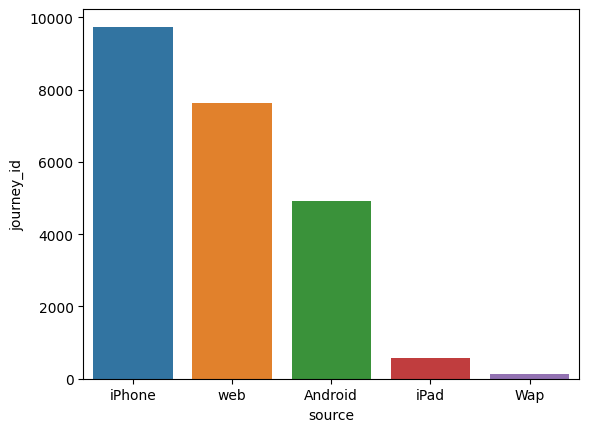

In [15]:
sns.barplot(data=orders_by_platform, x='source', y='journey_id');

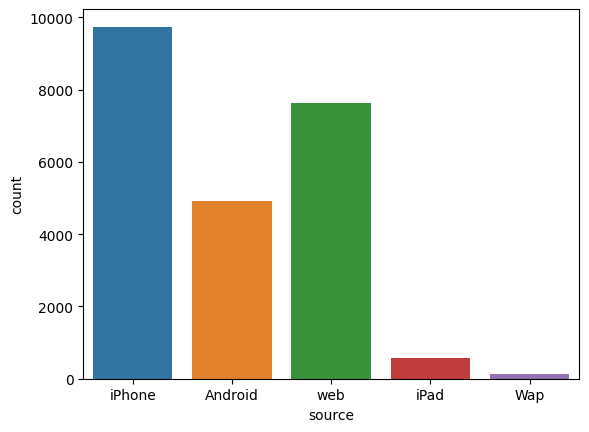

In [16]:
sns.countplot(x=taxi['source']);

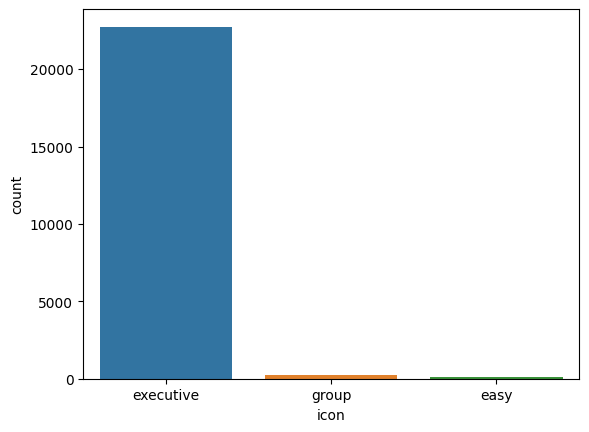

In [17]:
sns.countplot(x=taxi['icon']);

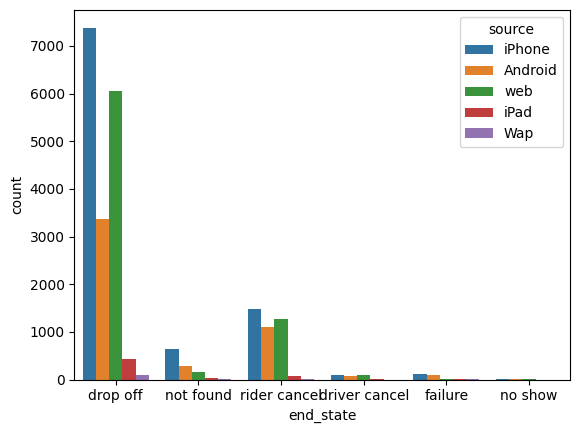

In [18]:
sns.countplot(x=taxi['end_state'], hue=taxi['source']);

In [19]:
taxi.driver_score.value_counts()

5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: driver_score, dtype: int64

In [42]:
scores = (taxi.driver_score.value_counts(normalize=True)
          .mul(100)
          .round(2))

In [43]:
scores

5.0    58.81
4.0    21.88
0.0    14.30
3.0     2.97
1.0     1.23
2.0     0.81
Name: driver_score, dtype: float64

In [52]:
driver_score_counts = (scores
                       .reset_index()
                       .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'})
                       .sort_values(by='driver_score'))

In [53]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81
